<a href="https://colab.research.google.com/github/OnurKerimoglu/Colab_Notebooks/blob/master/DSR_NLP4_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info=True
)
dataset_train_original = datasets[0]
dataset_validate_original = datasets[1]
dataset_test_original = datasets[2]
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF3PF60/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF3PF60/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteF3PF60/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        '

In [ ]:
dataset_train = dataset_train_original.cache()
dataset_train = dataset_train.shuffle(25_000)
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.cache()
dataset_validate = dataset_validate.batch(128)

dataset_test = dataset_test_original.batch(128)

In [ ]:
def render_history(history):
    plt.title("Our losses")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Our accuracies")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"
)
encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(512))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 128, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
196/196 [==============================] - 12s 26ms/step - loss: 0.6927 - accuracy: 0.5230 - val_loss: 0.

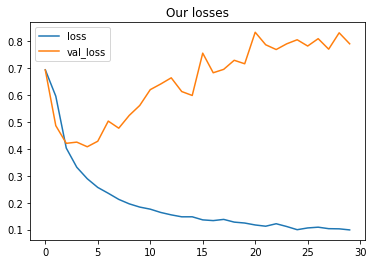

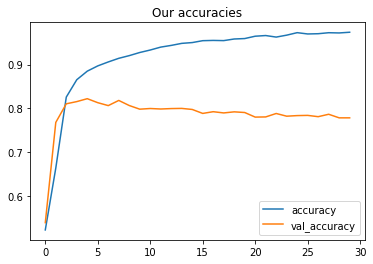

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=30,
    validation_data=dataset_validate
)

render_history(history)

In [ ]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.LSTM(64))
model.add(layers.LSTM())

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 128, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
Total params: 344,832
Trainable params: 344,832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#A multi-layer LSTM
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(256))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

# model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.0001),
#     loss="binary_crossentropy",
#     metrics=["accuracy"]
# )

# history = model.fit(
#     dataset_train,
#     epochs=30,
#     validation_data=dataset_validate
# )

# render_history(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 128, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 128, 64)           24832     
                                                                 
 lstm_1 (LSTM)               (None, 128, 128)          98816     
                                                                 
 lstm_2 (LSTM)               (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                      

In [ ]:
#LSTM's tend to forget the beginning of the sequences
#As an easy fix, the sequence can be reversed and concatanated with the original sequence
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 128, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 369,793
Trainable params: 369,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#GRU: Like LSTM, but a bit faster, and a bit inaccurate
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.GRU(64))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()